In [1]:
import os, sys
sys.path.insert(0, '/hkfs/work/workspace/scratch/cc7738-benchmark_tag/TAPE_chen/core')

from torch_geometric.loader import NeighborLoader
from data_utils.load_data_lp import load_taglp_arxiv2023, load_tag_arxiv23
from yacs.config import CfgNode as CN



/home/hk-project-test-p0021478/cc7738/anaconda3/envs/EAsF/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def init_cfg_test():
    """
    Initialize a CfgNode instance to test dataloader for link prediction.

    Args:
        cfg_dict (dict): Dictionary containing configuration parameters.

    Returns:
        CN: Initialized CfgNode instance.
    """
    cfg_dict = {
        'data': {  
            'undirected': True,
            'include_negatives': True,
            'val_pct': 0.1,
            'test_pct': 0.1,
            'split_labels': True,
            'device': 'cpu',
            'split_index': [0.8, 0.15, 0.05]
            },
        'train':  {
                'device': 'cpu'
            }
    }
    return CN(cfg_dict)

In [25]:
args = init_cfg_test()
print(args)
data, text = load_tag_arxiv23()
loader = NeighborLoader(
                data,
                # Sample 30 neighbors for each node for 2 iterations
                num_neighbors=[30] * 2,
                # Use a batch size of 128 for sampling training nodes
                batch_size=4,
                input_nodes=data.train_mask,
            )

data:
  device: cpu
  include_negatives: True
  split_index: [0.8, 0.15, 0.05]
  split_labels: True
  test_pct: 0.1
  undirected: True
  val_pct: 0.1
train:
  device: cpu


/home/hk-project-test-p0021478/cc7738/anaconda3/envs/EAsF/lib/python3.8/site-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


In [26]:
sampled_data = next(iter(loader))
print(sampled_data.batch_size)

4


In [27]:
sampled_data.is_directed()

True

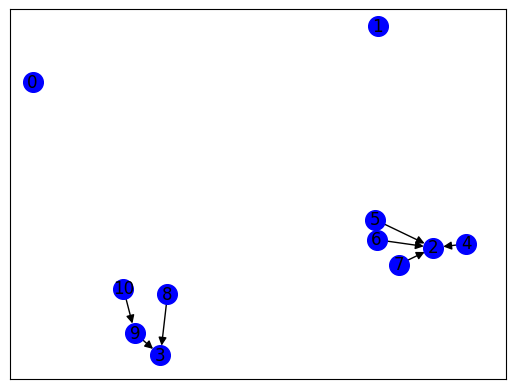

In [29]:
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
g = to_networkx(sampled_data)

edge_colours = ['b' for _ in g.edges()]

options = {
    'node_color': 'blue',
    'node_size': 200,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}
nx.draw_networkx(g, arrows=True, **options)

In [44]:
subgraph_type =  'directional'
subgraph = NeighborLoader(
                data,
                # Sample 30 neighbors for each node for 2 iterations
                num_neighbors=[30] * 2,
                # Use a batch size of 128 for sampling training nodes
                batch_size=4,
                input_nodes=data.train_mask,
                subgraph_type='bidirectional',
            )
sampled_subgraph = next(iter(subgraph))
print(sampled_subgraph.batch_size)
sampled_subgraph.has_isolated_nodes()

4


/home/hk-project-test-p0021478/cc7738/anaconda3/envs/EAsF/lib/python3.8/site-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


True

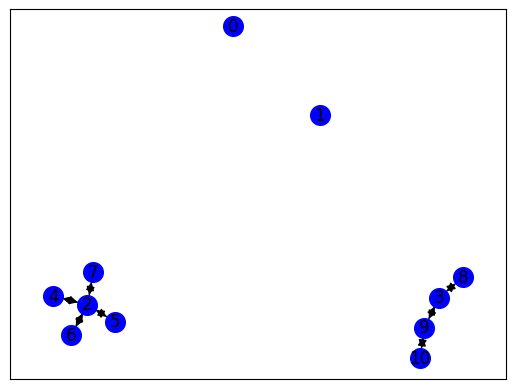

In [45]:
subgraph = to_networkx(sampled_subgraph)

edge_colours = ['b' for _ in subgraph.edges()]

options = {
    'node_color': 'blue',
    'node_size': 200,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}
nx.draw_networkx(subgraph, arrows=True, **options)